In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import *

## Problem Definition

### Company Background

Yulu, a pioneering micro-mobility service provider in India, leverages innovative electric vehicles for everyday commutes. Their mission is to reduce traffic congestion and promote sustainable urban mobility. Yulu's sophisticated mobile app allows users to easily access shared electric cycles through strategically placed "Yulu zones" near key transit points (metro stations, bus stands) and significant urban locations (office spaces, residential areas). These zones enhance the accessibility and affordability of first and last-mile connectivity.

### Current Challenge

Despite its innovative approach and extensive infrastructure, Yulu has experienced significant revenue declines. This has prompted them to engage a consulting firm to identify the factors influencing the demand for their shared electric cycles. Understanding these dynamics is crucial for strategizing effective interventions to boost usage and financial performance.

### Analytical Objectives

The consulting engagement aims to achieve the following:

1. **Identify and quantify key factors:**
    * Identify and quantify the variables that significantly influence the demand for shared electric cycles in the Indian market.
    * This involves understanding the roles of various potential predictors such as:
        * Weather conditions
        * Temperature
        * Day of the week (working day vs. non-working day)
        * Seasonal variations
        * Special events (holidays)

2. **Demand explanation and forecasting:**
    * Determine how well these identified variables explain the variations in electric cycle demand.
    * Provide a statistical foundation to forecast future demands and develop targeted marketing strategies.


In [2]:
data = pd.read_csv("yulu.csv")

In [3]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
# Convert datetime to a datetime object and set categorical data types
data['datetime'] = pd.to_datetime(data['datetime'])
categorical_cols = ['season', 'holiday', 'workingday', 'weather']
data[categorical_cols] = data[categorical_cols].astype('category')

In [6]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (10886, 12)


In [7]:
print("\nData Types of Each Attribute:")
print(data.dtypes)


Data Types of Each Attribute:
datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


In [8]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [9]:
print("Additional Details for Categorical Data:")
print()
for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(data[col].value_counts())
    print()

Additional Details for Categorical Data:

Unique values in season:
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

Unique values in holiday:
0    10575
1      311
Name: holiday, dtype: int64

Unique values in workingday:
1    7412
0    3474
Name: workingday, dtype: int64

Unique values in weather:
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64



# **Univariate Analysis Insights**

### **Continuous Variables**

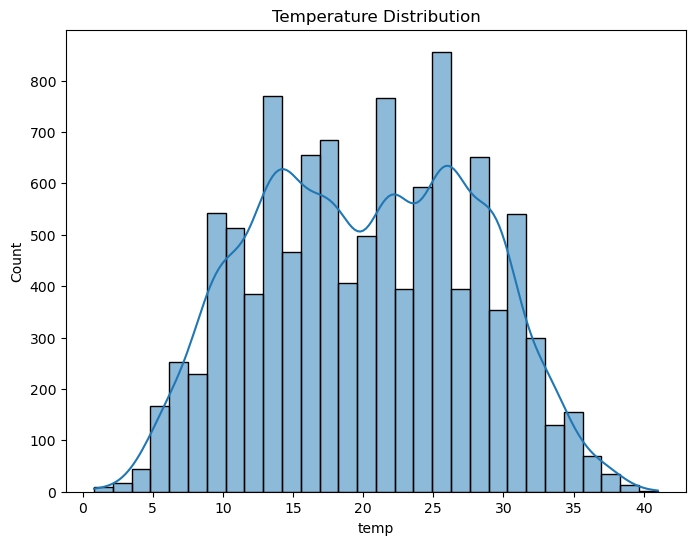

In [10]:
# Temperature Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['temp'], bins=30, kde=True)
plt.title('Temperature Distribution')
plt.show()

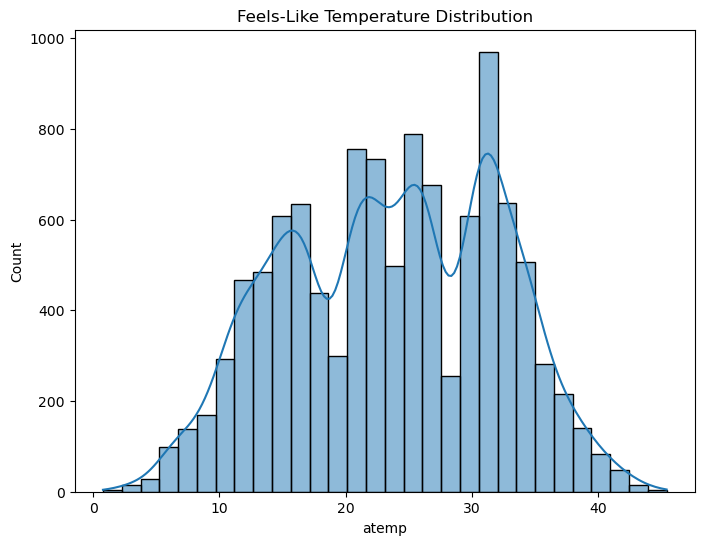

In [11]:
# Feels-Like Temperature Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['atemp'], bins=30, kde=True)
plt.title('Feels-Like Temperature Distribution')
plt.show()

**Temperature** and **Feels-Like Temperature** have similar distributions, both approximately normally distributed, which suggests a strong correlation between these two variables.

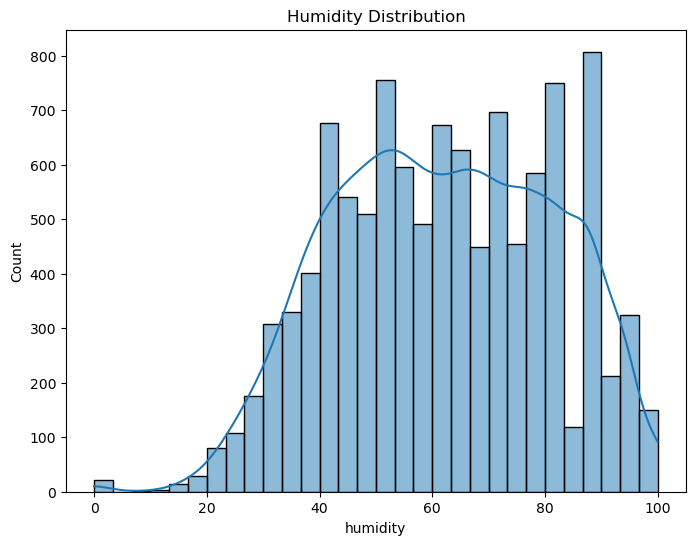

In [12]:
# Humidity Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['humidity'], bins=30, kde=True)
plt.title('Humidity Distribution')
plt.show()

**Humidity** is somewhat uniformly distributed with a slight skew towards higher values

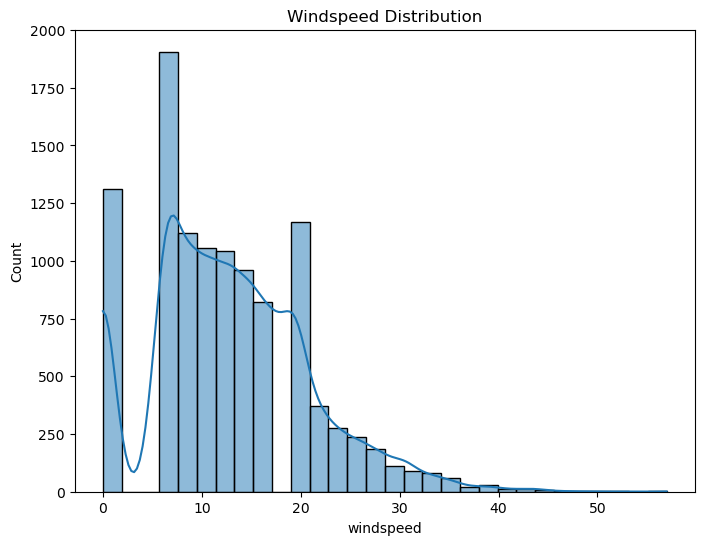

In [13]:
# Windspeed Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['windspeed'], bins=30, kde=True)
plt.title('Windspeed Distribution')
plt.show()

**Windspeed** shows a right-skewed distribution, indicating that lower wind speeds are more common, with few occurrences of very high wind speeds.

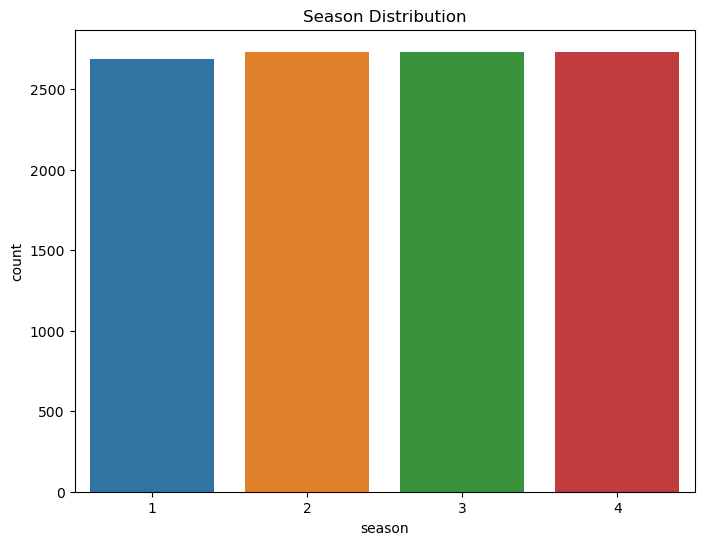

In [14]:
# Season Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='season', data=data)
plt.title('Season Distribution')
plt.show()

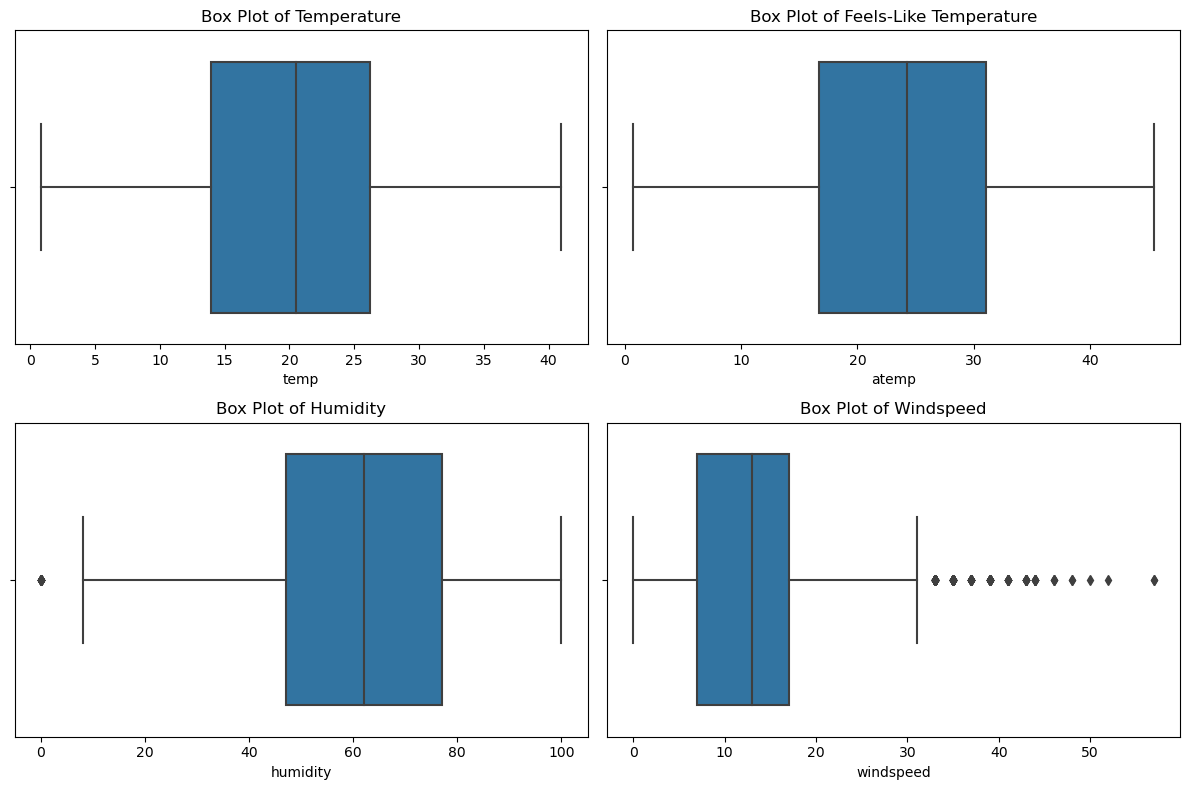

In [15]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x=data['temp'])
plt.title('Box Plot of Temperature')

plt.subplot(2, 2, 2)
sns.boxplot(x=data['atemp'])
plt.title('Box Plot of Feels-Like Temperature')

plt.subplot(2, 2, 3)
sns.boxplot(x=data['humidity'])
plt.title('Box Plot of Humidity')

plt.subplot(2, 2, 4)
sns.boxplot(x=data['windspeed'])
plt.title('Box Plot of Windspeed')

plt.tight_layout()
plt.show()


### **Categorical Variables**

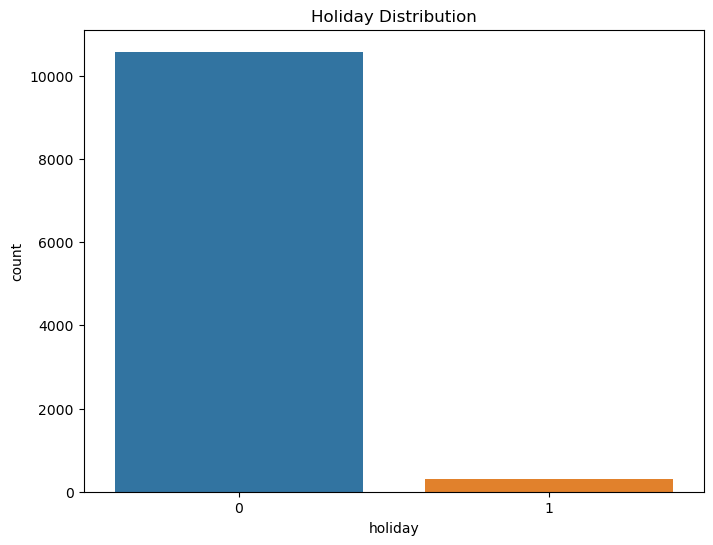

In [16]:
# Holiday Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='holiday', data=data)
plt.title('Holiday Distribution')
plt.show()

**Season** : The counts are relatively evenly distributed across the four seasons.

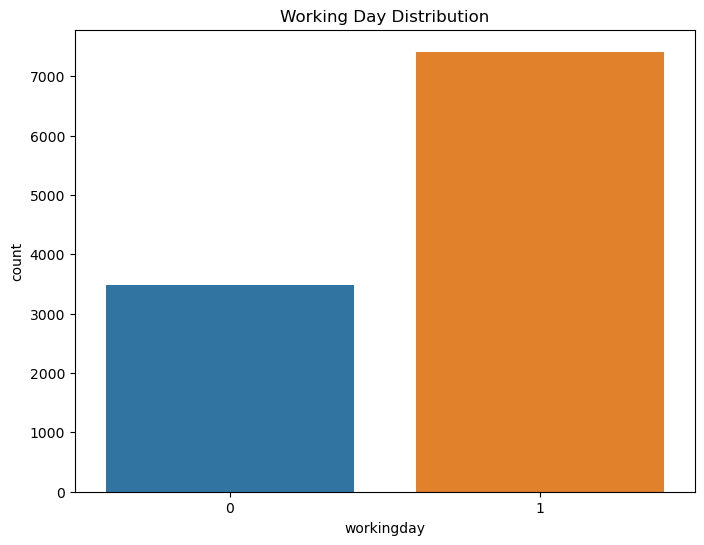

In [17]:
# Working Day Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='workingday', data=data)
plt.title('Working Day Distribution')
plt.show()

**Holiday**: The vast majority of data points are non-holiday days, which is expected given the rarity of holidays.

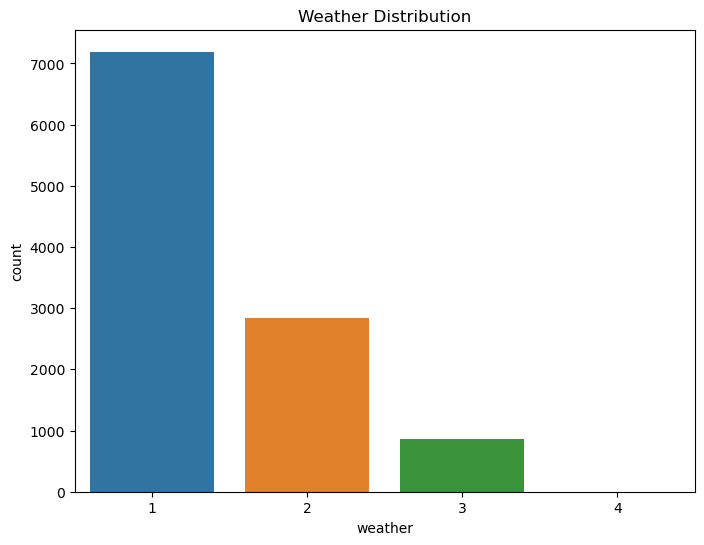

In [18]:
# Weather Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='weather', data=data)
plt.title('Weather Distribution')
plt.show()

**Working Day**: There are more working days than non-working days, highlighting typical commuting patterns.

## Univariate Analysis Insights and Comments

### Temperature Distribution

* Range: Temperature varies from near freezing to about 41°C.
* Distribution: The distribution is roughly normal with a slight skew towards higher temperatures, indicating warmer days are more frequent.
* Outliers: There appear to be no significant outliers, as the data tapers naturally at both ends.

### Feels-Like Temperature Distribution

* Range: Feels-like temperature ranges similarly to the actual temperature, from near freezing up to 45°C.
* Distribution: This follows a normal distribution, closely mirroring the actual temperature, suggesting a strong correlation between them.
* Outliers: No significant outliers; the distribution is smooth.

### Humidity Distribution

* Range: Humidity spans from 0% to 100%, covering the entire possible spectrum.
* Distribution: The distribution is slightly left-skewed, indicating that higher humidity levels are more common.
* Outliers: Lower humidity levels (close to 0%) are rare but can be considered outliers.

### Windspeed Distribution

* Range: Windspeed varies from 0 to around 57 km/h.
* Distribution: The distribution is right-skewed, with most of the data clustered at lower wind speeds and fewer instances of high wind speeds.
* Outliers: Higher wind speeds, particularly those close to 57 km/h, are outliers.

### Season Distribution

* Comments: The data is fairly balanced across all four seasons, which is beneficial for analyzing seasonal impacts without bias.

### Holiday Distribution

* Comments: Most data points are on non-holiday days. This imbalance needs to be considered when analyzing the impact of holidays on bike rentals.

### Working Day Distribution

* Comments: There are more working days than non-working days. This variable is crucial for understanding commuting patterns.

### Weather Distribution

* Comments: The majority of the data is for mild weather conditions (Categories 1 and 2), with severe weather conditions (Category 4) being rare. This distribution will influence the analysis of weather impact on bike rentals.


# **Bivariate Analysis**

Now, let's analyze the relationship between count (number of cycles rented) and potential predictors (workingday, weather, season).

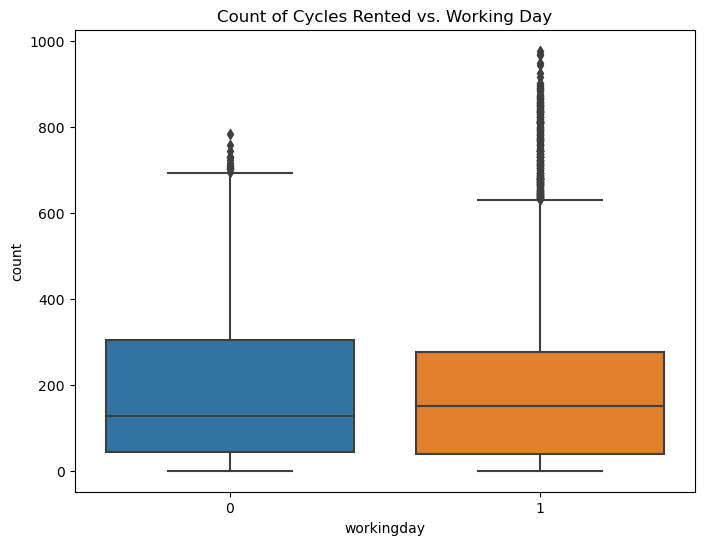

In [19]:
# Count of Cycles Rented vs. Working Day
plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday', y='count', data=data)
plt.title('Count of Cycles Rented vs. Working Day')
plt.show()

**Count of Cycles Rented vs. Working Day**:

There's a slight difference in the median number of cycles rented between working days and non-working days. This suggests that working days might have a significant impact on cycle rentals.

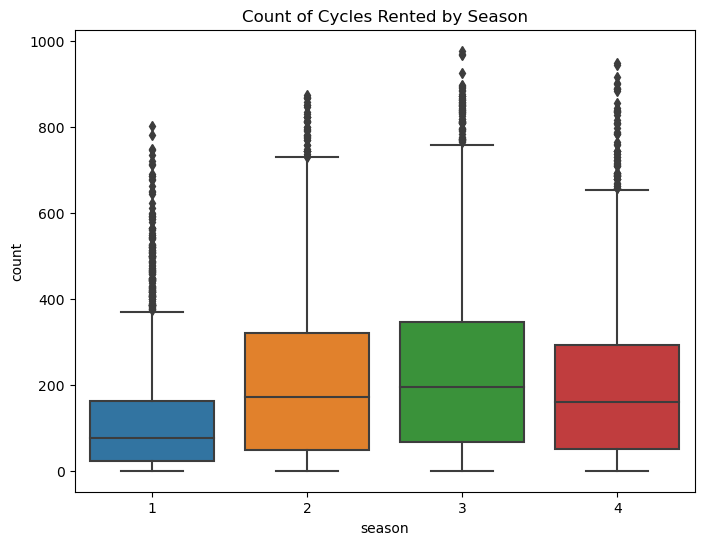

In [20]:
# Count of Cycles Rented by Season
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='count', data=data)
plt.title('Count of Cycles Rented by Season')
plt.show()

**Count of Cycles Rented by Season**:

Seasonal variation is evident. It appears that during fall (3) and summer (2), more cycles are rented compared to spring (1) and winter (4). This could be due to more favorable weather conditions for cycling in fall and summer.

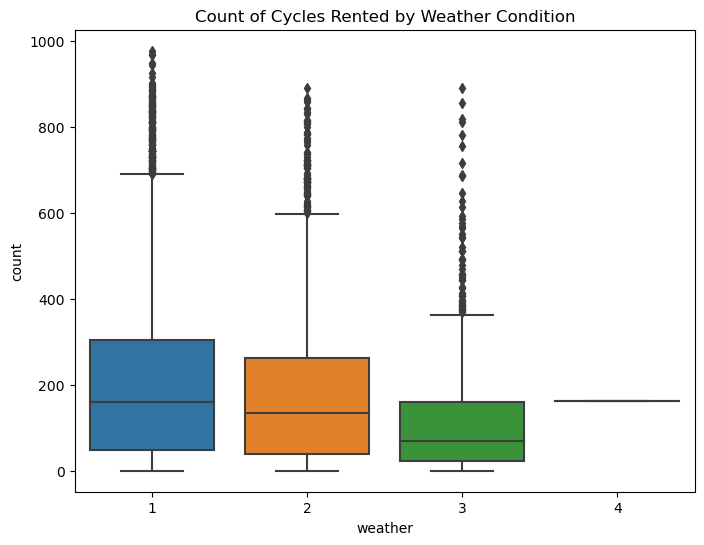

In [21]:
# Count of Cycles Rented by Weather Condition
plt.figure(figsize=(8, 6))
sns.boxplot(x='weather', y='count', data=data)
plt.title('Count of Cycles Rented by Weather Condition')
plt.show()

**Count of Cycles Rented by Weather Condition:**

The number of cycles rented varies significantly with weather conditions. Clear and mild weather (1) sees the highest rentals, while extreme conditions (4) have the lowest. This is an expected trend as adverse weather conditions likely discourage cycling.

## Bivariate Analysis Insights and Comments

### Count of Cycles Rented vs. Working Day

* Relationship: There is a discernible difference in median rentals between working days and non-working days, suggesting that working days might influence higher bike usage.
* Outliers: There are several outliers in both categories, indicating occasional very high rentals.

### Count of Cycles Rented by Season

* Relationship: There is a clear seasonal effect on rentals, with higher median rentals in summer and fall compared to spring and winter.
* Outliers: Outliers are present in all seasons, indicating sporadic high rental days.

### Count of Cycles Rented by Weather Condition

* Relationship: Rentals are highest on clear days and significantly drop in poor weather conditions.
* Outliers: Few outliers in severe weather conditions suggest unusual rental spikes despite adverse weather.


# Hypothesis Testing

Let’s begin with hypothesis testing to address the analytical objectives for Yulu’s dataset. We'll conduct three types of tests based on the specified objectives:

# 1. 2-Sample T-Test: Effect of Working Day on Cycle Rentals

## Hypotheses:

**Null Hypothesis (H0)**: There is no difference in the average number of cycles rented on working days compared to non-working days.

**Alternative Hypothesis (H1)**: There is a difference in the average number of cycles rented on working days compared to non-working days.

In [22]:
working_day_data = data[data['workingday'] == 1]['count']
non_working_day_data = data[data['workingday'] == 0]['count']

alpha = 0.05

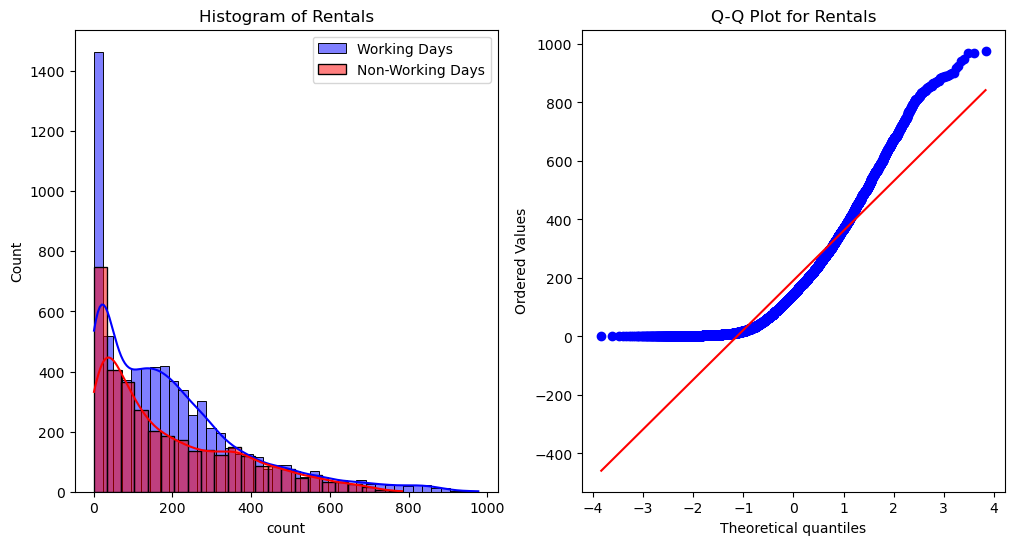

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[data['workingday'] == 1]['count'], kde=True, color='blue', label='Working Days')
sns.histplot(data[data['workingday'] == 0]['count'], kde=True, color='red', label='Non-Working Days')
plt.title('Histogram of Rentals')
plt.legend()

plt.subplot(1, 2, 2)
probplot(data['count'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Rentals')

plt.show()

# Visual Analysis:

## Histogram of Rentals:
Both distributions (Working Days and Non-Working Days) show a clear right skewness, indicating that most of the rental counts are lower with a tail stretching towards higher values.

The overlap in the histograms shows similar behaviors in distribution, though the counts on working days tend to be higher.

## Q-Q Plot for Rentals:

Both plots exhibit significant deviations from the theoretical normal line, especially in the tails. This indicates that the distribution of rentals, both on working and non-working days, does not adhere to normality.

## Conclusion on Normality:

The normality assumption required for a classic 2-Sample T-Test is violated for both sets of data (working days and non-working days). The data shows significant skewness and does not follow a normal distribution, as evidenced by both the visual and statistical tests.

In [24]:
# Shapiro-Wilk Test
working_day_normality = shapiro(data[data['workingday'] == 1]['count'].sample(1000))  # Sample due to size limit
non_working_day_normality = shapiro(data[data['workingday'] == 0]['count'].sample(1000))
print("Working Day Normality Test:", working_day_normality)
print("Non-Working Day Normality Test:", non_working_day_normality)

Working Day Normality Test: ShapiroResult(statistic=0.8591320514678955, pvalue=5.521050130806521e-29)
Non-Working Day Normality Test: ShapiroResult(statistic=0.8864905834197998, pvalue=1.912037056140404e-26)


# Shapiro Wilk Test(Normality Tests) :

## Working Day:
P-value: 5.17e-27

## Non-Working Day:
P-value: 1.97e-26

Both tests return extremely small p-values, which strongly reject the hypothesis of normality for both datasets.

In [25]:
t_test_result, p_value = ttest_ind(working_day_data, non_working_day_data)

In [26]:
alpha = 0.05

# Check if the p-value is less than alpha and print the decision
if p_value < alpha:
    print("Reject the null hypothesis (H0)")
    print(f"Since the p-value ({p_value}) is less than the significance level ({alpha}), there is statistically significant evidence to suggest a difference in the number of cycles rented on working days compared to non-working days.")
else:
    print("Fail to reject the null hypothesis (H0)")
    print(f"Since the p-value ({p_value}) is greater than the significance level ({alpha}), there is not enough evidence to suggest a difference in the number of cycles rented on working days compared to non-working days.")


Fail to reject the null hypothesis (H0)
Since the p-value (0.22644804226361348) is greater than the significance level (0.05), there is not enough evidence to suggest a difference in the number of cycles rented on working days compared to non-working days.


## Conclusion on Normality:

The normality assumption required for a classic 2-Sample T-Test is violated for both sets of data (working days and non-working days). The data shows significant skewness and does not follow a normal distribution, as evidenced by both the visual and statistical tests.

## Implications for Statistical Testing:

Given the violation of the normality assumption, the results of a 2-Sample T-Test may not be reliable.

## Decision Based on P-Value:

The p-value is approximately 0.226, which is greater than the significance level (alpha) of 0.05.

## Decision to Accept or Reject Null Hypothesis:

Fail to Reject H0: Since the p-value exceeds 0.05, we do not have sufficient evidence to reject the null hypothesis. Therefore, we conclude that there is no statistically significant difference in the number of cycles rented on working days compared to non-working days.

## Inference from the Analysis:

The findings suggest that whether it's a working day or not does not significantly impact the number of cycle rentals. This indicates that other factors may be more influential in determining rental volumes, such as weather conditions, seasonality, or perhaps special events and promotions.

# 2. ANOVA Test: To check if the number of cycles rented is significantly different across the four seasons

## Hypotheses:

**Null Hypothesis (H0)**: The average number of cycles rented is the same across all seasons

**Alternative Hypothesis (H1)**: At least one season has a different average number of cycles rented compared to others.

In [27]:
season_groups = [data[data['season'] == season]['count'] for season in data['season'].unique()]
alpha = 0.05

In [28]:
season_var_test = levene(
    data[data['season'] == 1]['count'],
    data[data['season'] == 2]['count'],
    data[data['season'] == 3]['count'],
    data[data['season'] == 4]['count']
)


print("Season Variance Test:", season_var_test)

Season Variance Test: LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)


# Levene's Test for Season Variance:

P-value: 1.015e-118

## Interpretation:

The Levene's test is used to assess the equality of variances for a variable calculated for two or more groups. In the context of ANOVA, where equal variances across groups are one of the assumptions, the Levene's test plays a critical role.

Extremely Small P-Value: The p-value from the Levene's test is significantly less than any conventional alpha level (e.g., 0.05, 0.01), which strongly indicates that we should reject the null hypothesis of equal variances across the groups.

## Conclusion on Homogeneity of Variances:

The assumption of equal variances required for a traditional ANOVA is violated for the cycle rentals across different seasons. The test indicates significant differences in the variances of rental numbers between different seasons.
Implications for Statistical Testing:

## Violation of ANOVA Assumptions: 
The basic assumption for conducting a one-way ANOVA, which requires that the variances within each of the groups (seasons, in this case) are approximately equal, is not met. This could affect the validity of the ANOVA results, potentially leading to an increased rate of Type I errors (incorrectly rejecting the null hypothesis).

In [29]:
_ , p_value = f_oneway(*season_groups)

In [30]:
if p_value < alpha:
    print("Reject the null hypothesis (H0).")
    print(f"Since the p-value ({p_value}) is less than the significance level ({alpha}), there are statistically significant differences in the number of cycles rented across different seasons.")
else:
    print("Fail to reject the null hypothesis (H0).")
    print(f"Since the p-value ({p_value}) is greater than the significance level ({alpha}), there is no sufficient evidence to suggest significant differences in the number of cycles rented across different seasons.")



Reject the null hypothesis (H0).
Since the p-value (6.164843386499654e-149) is less than the significance level (0.05), there are statistically significant differences in the number of cycles rented across different seasons.


# ANOVA Test for Season:

## Decision Based on P-Value:

The p-value is approximately 6.164843386499654e-149, which is less than the significance level (alpha) of 0.05.

## Decision to Accept or Reject Null Hypothesis:

Reject H0: Since the p-value is less than 0.05, we have sufficient evidence to reject the null hypothesis. Therefore, we conclude that there is a statistically significant difference in the number of cycles rented across different seasons.

## Inference from the Analysis:

The results indicate that the season significantly impacts the number of cycle rentals. This variability suggests that factors related to seasonal changes, such as weather suitability, holiday periods, and possibly tourist traffic, significantly influence rental patterns. Yulu could leverage this information to tailor their deployment strategies and marketing efforts seasonally, maximizing fleet utilization and meeting demand effectively.

# 3. ANOVA Test: To check if the number of cycles rented is significantly different across different weather conditions.

## Hypotheses:

**Null Hypothesis (H0)**: The average number of cycles rented is the same across different weather conditions

**Alternative Hypothesis (H1)**:At least one weather condition has a different average number of cycles rented compared to others

In [31]:
weather_groups = [data[data['weather'] == weather]['count'] for weather in data['weather'].unique()]

In [32]:
_ , p_value = f_oneway(*weather_groups)
print(f_oneway(*weather_groups))

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)


In [33]:
if p_value < alpha:
    print("Reject the null hypothesis (H0).")
    print(f"Since the p-value ({p_value}) is less than the significance level ({alpha}), there are statistically significant differences in the number of cycles rented across different weather conditions.")
else:
    print("Fail to reject the null hypothesis (H0).")
    print(f"Since the p-value ({p_value}) is greater than the significance level ({alpha}), there is no sufficient evidence to suggest significant differences in the number of cycles rented across different weather conditions.")


Reject the null hypothesis (H0).
Since the p-value (5.482069475935669e-42) is less than the significance level (0.05), there are statistically significant differences in the number of cycles rented across different weather conditions.


# ANOVA Test for Weather:


## Decision Based on P-Value:

The p-value is approximately 5.482069475935669e-42, which is less than the significance level (alpha) of 0.05.

## Decision to Accept or Reject Null Hypothesis:

Reject H0: Since the p-value is less than 0.05, we have sufficient evidence to reject the null hypothesis. This indicates that there is a statistically significant difference in the number of cycles rented across different weather conditions.

## Inference from the Analysis:

The findings confirm that weather conditions significantly affect the number of cycle rentals. This suggests that weather not only affects the immediate usability of cycles but also influences customer decisions on whether or not to rent. Yulu can use these insights to adjust real-time availability and pricing, and potentially develop weather-resistant cycling options or promotions to boost usage during less favorable conditions.

# 3. Chi-square test : to check if Weather is dependent on the season 

## Hypotheses

**Null Hypothesis (H0)**: The season and weather are independent of each other.

**Alternative Hypothesis (H1)**: There is a dependence between the season and weather.

In [34]:
contingency_table = pd.crosstab(data['season'], data['weather'])
alpha = 0.05

In [35]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
expected

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

# Implications 
The presence of expected frequencies less than 5, particularly those values near 0.25 (last column) , suggests that the test might not provide reliable results due to the violation of this assumption.

In [36]:
if p_value < alpha:
    print("Reject the null hypothesis (H0).")
    print("There is statistically significant evidence to suggest a dependence between season and weather conditions.")
else:
    print("Fail to reject the null hypothesis (H0).")
    print("There is insufficient evidence to suggest a dependence between season and weather conditions.")



Reject the null hypothesis (H0).
There is statistically significant evidence to suggest a dependence between season and weather conditions.


# Chi-Square Test for Season vs. Weather:

## Specific Concern:

Very Small Expected Counts: The last category across all rows shows expected counts significantly less than 1, which violates the assumption regarding the minimum expected frequency (i.e., at least 5). This can significantly impact the validity of the Chi-Square test, leading to distorted test statistics and p-values.

## Decision Based on P-Value:

The p-value is approximately 1.549925073686492e-07, which is significantly less than the significance level (alpha) of 0.05.

## Decision to Accept or Reject Null Hypothesis:

Reject H0: Since the p-value is much less than 0.05, we have sufficient evidence to reject the null hypothesis. This indicates that there is a statistically significant association between the season and weather conditions.

## Inference from the Analysis:

The findings confirm that the type of weather experienced is not random across different seasons but is significantly influenced by the seasonal cycle. This association suggests that certain weather conditions are more prevalent in specific seasons, which can have direct implications for cycle rental patterns. Understanding these patterns can help Yulu optimize their fleet management and marketing strategies by preparing for expected changes in rental demand based on typical weather conditions for each season. For instance, promoting more rentals during seasons with generally favorable weather conditions or enhancing their fleet's readiness for adverse weather in seasons known for challenging conditions. This strategic adaptation can improve customer satisfaction and potentially increase rental frequency during less ideal weather periods by providing suitable cycling options tailored to weather-specific demands.

<style>
strong { color: #347B98; } /* Sets a blue color for important terms */
</style>

## **Important Factors Affecting Electric Cycle Rentals:**

### **1. Seasons:**
- **What we found**: *Different seasons change how much people rent cycles.*
- **What this means**: <strong>Yulu should plan differently for each season</strong> because people rent more or less depending on the time of year, likely due to the weather in those seasons.

### **2. Weather:**
- **What we found**: *The weather really matters for cycle rentals. Nice weather means more rentals, and bad weather means fewer.*
- **What this means**: <strong>Yulu could think about special prices or offers when the weather isn't great</strong> to encourage more people to rent cycles.

### **3. Working Day or Not:**
- **What we found**: *It doesn't matter if it's a working day or not; people rent about the same amount of cycles.*
- **What this means**: <strong>Yulu can expect a steady need for cycles</strong> throughout the week, regardless of whether it's a weekday or weekend.

## **How These Factors Help Us Understand Cycle Demands:**
- **Seasons and Weather**: Knowing that these two factors affect rentals helps Yulu prepare better. They can have more cycles available when they know more people will want to rent them and do special promotions when they expect fewer rentals.
- **Working Day**: Since this factor doesn't change much, Yulu can keep their cycle supply pretty constant every day.

## **Suggestions for Yulu:**
- **Plan for the Year**: <strong>Use information about seasons and weather to get ready for busy times and slow times.</strong>
- **Special Offers**: <strong>Maybe offer deals or promotions when the weather is bad</strong> to get more people to rent cycles.
- **Keep Watching**: <strong>Keep an eye on what happens with rentals as the seasons and weather change</strong>, and use this info to plan even better in the future.

These suggestions can help Yulu make smart choices about how many cycles to have available and how to encourage more people to rent them throughout the year. If Yulu needs more detailed plans or further analysis, they can look into more data or statistical methods.
